## Trabalho Final - Ciência de Dados - Enap / 2020

# Preencha seu Nome: Rafael Costa

### Apresentação do Dataset

In [ ]:
# YOUR CODE HERE

#### Link para Download do Dataset

# Cole o link do dataset aqui

Tax Revenue as Precentage of GDP: https://stats.oecd.org/Index.aspx?DataSetCode=RS_GBL  

Taas Revenues as Percentage of GDP: Public Sector, Taxation and Market Regulation -> Government at a Glance ->
Taxation -> Global Revenue Statistics Database -> Global Revenue Statistics Database

GINI: Social Protection and Well-being -> Income distribution and poverty -> Income Distribution Database -> Income Distribution Database

GINI - Site do Banco Mundial: https://data.worldbank.org/indicator/SI.POV.GINI?name_desc=false

### Motivação

In [10]:
# YOUR CODE HERE


raise NotImplementedError()

NotImplementedError: 

### Investigação

In [4]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib
#sns.set() 

In [2]:
# Caminho para os dados gini da OCDE
gini_ocde_file_path = "../../home_work_coding_bootcamp_ds/data/gini/gini_disposable_income_post_tax_transfers.csv"
# Caminho para os dados gini da OCDE
gini_wb_file_path = "../../home_work_coding_bootcamp_ds/data/gini/gini_wb.csv" # <- Banco mundial

In [28]:
##############################################################
#                             GINI                           #
##############################################################

#### Carregando dados gini da OCDE
# Definindo os tipos das colunas de interesse
col_types_gini = {
    "LOCATION":"string",
    "Country":"string",
    "Year":"int64", 
    "METHODO":"string", 
    "Value":"float64", 
    "AGE": "string",
    "Measure":"string",
    "MEASURE":"string"
}
# Lendo e carregando o arquivo
gini = pd.read_csv(gini_ocde_file_path, header=0, dtype=col_types_gini )

# Renomeando columna
gini.rename(columns={
    "MEASURE":"index_name",
    "LOCATION":"country_code",
    "Value": "gini_value" # esta coluna renomeada para que não seja confundida com o valor da carga tributária quando for feito o merge
}, inplace=True)

# Limpando os dados: 
# - Filtrano os dados de modo que o dataFrame gini tenha apenas registros com o indicador gini, 
#   antes dos impostos e transferências (GINIB). GINI para o indicador depois dos impostos.
# - Esclada de medição: 0 - 1;
# - Idade da população: total.
gini = gini[(gini["index_name"] == "GINIB") & (gini["Unit"] == "0-1 scale") & (gini["AGE"] == "TOT")]

# Selecionando o ano de análise...
# - O ano selecionado foi 2017, em que há 31 registros informados para o  indicador GINI.
# - Para 2019, há apenas um registro! Para 2018, há 7 registros, sendo a população muito pequena.
# - Para 2017, há 31 registros, apenas 4 a menos do que para 2016.
# - 2017 é o ano mais recente com uma quantidade significativa de dados para análise. Este é o motivo da seleção.
#ano_selecionado = 2017
selected_year = 2017
gini = gini[gini["Year"] == selected_year]

# Filtando as colunas de interesse para deixar o dataset mais legível
gini = gini[[
    "country_code",
    "Country",
    "index_name",
    "Measure",
    "Year",
    "gini_value"
]]

gini["gini_value"] = round(gini["gini_value"],3)
gini

,country_code,Country,index_name,Measure,Year,gini_value
127,AUT,Austria,GINIB,"Gini (market income, before taxes and transfers)",2017,0.485
259,BEL,Belgium,GINIB,"Gini (market income, before taxes and transfers)",2017,0.486
391,CAN,Canada,GINIB,"Gini (market income, before taxes and transfers)",2017,0.438
529,CZE,Czech Republic,GINIB,"Gini (market income, before taxes and transfers)",2017,0.435
770,FIN,Finland,GINIB,"Gini (market income, before taxes and transfers)",2017,0.512
943,FRA,France,GINIB,"Gini (market income, before taxes and transfers)",2017,0.519
1081,DEU,Germany,GINIB,"Gini (market income, before taxes and transfers)",2017,0.500
1219,GRC,Greece,GINIB,"Gini (market income, before taxes and transfers)",2017,0.528
1348,HUN,Hungary,GINIB,"Gini (market income, before taxes and transfers)",2017,0.478
1524,IRL,Ireland,GINIB,"Gini (market income, before taxes and transfers)",2017,0.535


In [1]:
#### Carregando dados gini do Banco Mundial
# Estes dados serão apensados ao dataframe gini para aumentar a a mostra

# Definindo os tipos das colunas de interesse
column_types_wb={
    "Country Name":"string",
    "Country Code":"string",
    "Indicator Name": "string",
    selected_year: "float64" # Os valores estão nesta coluna, cujo nome é o ano
}

# Carregando os dados do csv para a variável gini
gini_wb = pd.read_csv(gini_wb_file_path, skiprows=4, header=0, dtype=column_types_wb)
# 
gini_wb = gini_wb.rename(
    columns={
        "Country Name": "Country", 
        "Country Code":"country_code", 
        "Indicator Name": "Measure"
    }
)

# Selecionando as colunas de interesse(para deixar o dataframe mais limpo)
gini_wb = gini_wb[[
    "Country",
    "country_code",
    "Measure",
    str(selected_year)
]]

#    Criando colunas index_name e Year, para que fique igual ao dataframe gini, ao qual o gini_wb (world bank)
# será apensado.
gini_wb["index_name"] = "GINI" # Adicionando coluna index_name
gini_wb["index_name"] = gini_wb["index_name"].astype("string")

gini_wb["Year"] = selected_year # Adicionando coluna Yar

#     Renomeando coluna que contém os valores GINI (2017) para gini_value, para que o dataframe gini_wb fique
# simétrico ao dataframe gini, ao qual será aensado.
gini_wb.rename(columns={str(selected_year):"gini_value"}, inplace=True)
gini_wb = gini_wb[gini_wb["gini_value"].notna()]
gini_wb["gini_value"] = round(gini_wb["gini_value"]/100,3)

# Organizando as colunas para que tenham a mesma sequência do dataframe gini
gini_wb = gini_wb[["country_code", "Country","index_name", "Measure", "Year", "gini_value"]]
gini_wb

NameError: name 'pd' is not defined

In [12]:
#### Carregando dados gini  SOMENTE  do Banco Mundial
# Estes dados serão apensados ao dataframe gini para aumentar a a mostra
selected_year = 2017
gini = None
# Definindo os tipos das colunas de interesse
column_types_wb={
    "Country Name":"string",
    "Country Code":"string",
    "Indicator Name": "string",
    str(selected_year): "float64" # Os valores estão nesta coluna, cujo nome é o ano
}

# Carregando os dados do csv para a variável gini
gini = pd.read_csv(gini_wb_file_path, skiprows=4, header=0, dtype=column_types_wb)
# 


gini = gini.rename(
    columns={
        "Country Name": "Country", 
        "Country Code":"country_code", 
        "Indicator Name": "Measure"
    }
)

# Selecionando as colunas de interesse(para deixar o dataframe mais limpo)
gini = gini[[
    "Country",
    "country_code",
    "Measure",
    str(selected_year)
]]

#    Criando colunas index_name e Year, para que fique igual ao dataframe gini, ao qual o gini_wb (world bank)
# será apensado.
gini["index_name"] = "GINI" # Adicionando coluna index_name
gini["index_name"] = gini["index_name"].astype("string")

gini["Year"] = selected_year # Adicionando coluna Yar

#     Renomeando coluna que contém os valores GINI (2017) para gini_value, para que o dataframe gini_wb fique
# simétrico ao dataframe gini, ao qual será aensado.
gini.rename(columns={str(selected_year):"gini_value"}, inplace=True)
gini = gini[gini["gini_value"].notna()]
#gini["gini_value"] = round(gini_wb["gini_value"]/100,3)

# Organizando as colunas para que tenham a mesma sequência do dataframe gini
gini = gini[["country_code", "Country","index_name", "Measure", "Year", "gini_value"]]

gini

,country_code,Country,index_name,Measure,Year,gini_value
3,ALB,Albania,GINI,Gini index (World Bank estimate),2017,33.2
7,ARG,Argentina,GINI,Gini index (World Bank estimate),2017,41.2
8,ARM,Armenia,GINI,Gini index (World Bank estimate),2017,33.6
12,AUT,Austria,GINI,Gini index (World Bank estimate),2017,29.7
15,BEL,Belgium,GINI,Gini index (World Bank estimate),2017,27.4
...,...,...,...,...,...,...
244,TZA,Tanzania,GINI,Gini index (World Bank estimate),2017,40.5
246,UKR,Ukraine,GINI,Gini index (World Bank estimate),2017,26.0
248,URY,Uruguay,GINI,Gini index (World Bank estimate),2017,39.5
259,XKX,Kosovo,GINI,Gini index (World Bank estimate),2017,29.0


In [30]:
### Adicionando dados do dataframe gini_wb (world bank) ao dataframe gini (OCDE).

# buscando dados que estão dataframe gini_wb, mas que não estão no gini (OCDE)
gini_wb_minus_ocde = gini_wb[~gini_wb["country_code"].isin(gini["country_code"].array)]

# Adicionando os dados do gini_wb_minus_ocde ao df do gini, para aumentar a amostra
gini = gini.append(gini_wb_minus_ocde)

# Dataframe gini montado para manipulação
# será filtrado com os países que possuem dados informadospara carga tributária
gini

,country_code,Country,index_name,Measure,Year,gini_value
127,AUT,Austria,GINIB,"Gini (market income, before taxes and transfers)",2017,0.485
259,BEL,Belgium,GINIB,"Gini (market income, before taxes and transfers)",2017,0.486
391,CAN,Canada,GINIB,"Gini (market income, before taxes and transfers)",2017,0.438
529,CZE,Czech Republic,GINIB,"Gini (market income, before taxes and transfers)",2017,0.435
770,FIN,Finland,GINIB,"Gini (market income, before taxes and transfers)",2017,0.512
...,...,...,...,...,...,...
244,TZA,Tanzania,GINI,Gini index (World Bank estimate),2017,0.405
246,UKR,Ukraine,GINI,Gini index (World Bank estimate),2017,0.260
248,URY,Uruguay,GINI,Gini index (World Bank estimate),2017,0.395
259,XKX,Kosovo,GINI,Gini index (World Bank estimate),2017,0.290


In [13]:
#################################################################################################################
#                                    CARGA TRIBUTÁRIA: ARRECADAÇÃO/PIB                                          #
#################################################################################################################

########################## Função: load_tax_income(tax_type) ##############################
#                                                                                         #
# - Descrição: carregada dados da relação arrecadação tributária/PIB, tendo como fonte    #
#   dados da OCDE.                                                                        #
#                                                                                         #
# - Parâmetro:                                                                            #
#  - Tipo: String                                                                         #
#  - Valores possíveis:                                                                   #
#    - TOTALTAX : retorna a carga tributária - CT relativa à tributação total             #
#    - 1000     : retorna a CT relativa à tributação sobre a renda                        #
#    - 2000     : retorna a tributáção da seguridade social                               #
#    - 3000     : retorna a CT relativa à tributação incidente sobre folha de pagamentos  #
#    - 4000     : retorna a CT relativa à tributação incidente sobre patrimônio           #
#    - 5000     : retorna a CT relativa à tributação incidente sobre bens e serviços      #
#    - 6000     : retorna a CT relativa à tributação incidente sobre outras bases         #
#
# - Retorno: dataframe com a carga tributária (arrecadação/PIB)                           #
###########################################################################################
def load_tax_income(tax_type):    
    # ct = carga tributária: arrecadação tributária como percentual do PIB
    
    ### Carga dos dados baixados da OCDE
    # Definição dos tipos dos dados
    data_type={
        "COU":"string", 
        "Country":"string", 
        "Level of government": "string",
        "TAX": "string",
        "VAR": "string"
    }

    # Leitura e carga do arquivo de carga tributária
    ct_percentual_pib = pd.read_csv("./data/total_tax_percentage_gdp.csv", header=0, dtype=data_type)
    ct_percentual_pib.rename(columns={"COU":"country_code"}, inplace=True)

    # Criando filtros
    flt_ano       = ct_percentual_pib["Year"] == selected_year          # Dados do ano de 2017
    flt_nivel_gov = ct_percentual_pib["Level of government"] == "Total" # Todos os níveis de governo (federal, estadual e municipal)
    flt_tributo   = ct_percentual_pib["TAX"] == tax_type                # Todos os tributos
    flt_base      = ct_percentual_pib["VAR"] == "TAXGDP"                # Somente dados da relação arrecadação/PIB (a relação poderia ser percentual da arrecadação de um tributo em relação à arrecadação total)

    # Aplicando filtros
    ct_percentual_pib = ct_percentual_pib[
        flt_ano       & # Somente dados do ano selecionado (2017)
        flt_nivel_gov & # Dados relativos a todos os níveis de governo
        flt_tributo   & # Dados relativos a todos os tributos (sobre renda, bens e serviços, folha de salário e etc.)
        flt_base       # Dados da arregadação em relação ao PIB (carga_tributária = arrecadação/PIB)
    ]     

    # Selecionando colunas de interesse
    ct_percentual_pib = ct_percentual_pib[[
        "country_code", 
        "Country", 
        "TAX", 
        "Tax revenue", 
        "Indicator", 
        "Year", 
        "Value"
    ]]
    
    ct_percentual_pib.rename(columns={"Value":"tax_burden_value"}, inplace=True)

    # Retornando o dataframe da carga tributŕia
    return ct_percentual_pib

In [16]:
#################################################################################################################
#                                         CARGA TRIBUTÁRIA x GINI                                               #
#################################################################################################################
### Será realizado um merge dos dataframes gini e da carga tributária com os seguintes objetivos:
# - Selecionar somente os países que tenham dados tanto para a CT quanto para o índice de Gini
# - Montar os gráficos 
# - Verificar a correção

# Buscando os dados da carga tributária -> arrecadação total / PIB
ct_tot_percentual_pib = load_tax_income("TOTALTAX")

#    Fazendo um join entre os dados gini e a carga tributária, para sincronizar os países com dados
# relativos à carga tributária e ao índice de Gini.
gini_ct_tot_pib = pd.merge(gini, ct_tot_percentual_pib, on="country_code")
gini_ct_tot_pib.corr()

,Year_x,gini_value,Year_y,tax_burden_value
Year_x,NaN,NaN,NaN,NaN
gini_value,NaN,1.000000,NaN,-0.604344
Year_y,NaN,NaN,NaN,NaN
tax_burden_value,NaN,-0.604344,NaN,1.000000


Text(0.5, 0, 'Países')

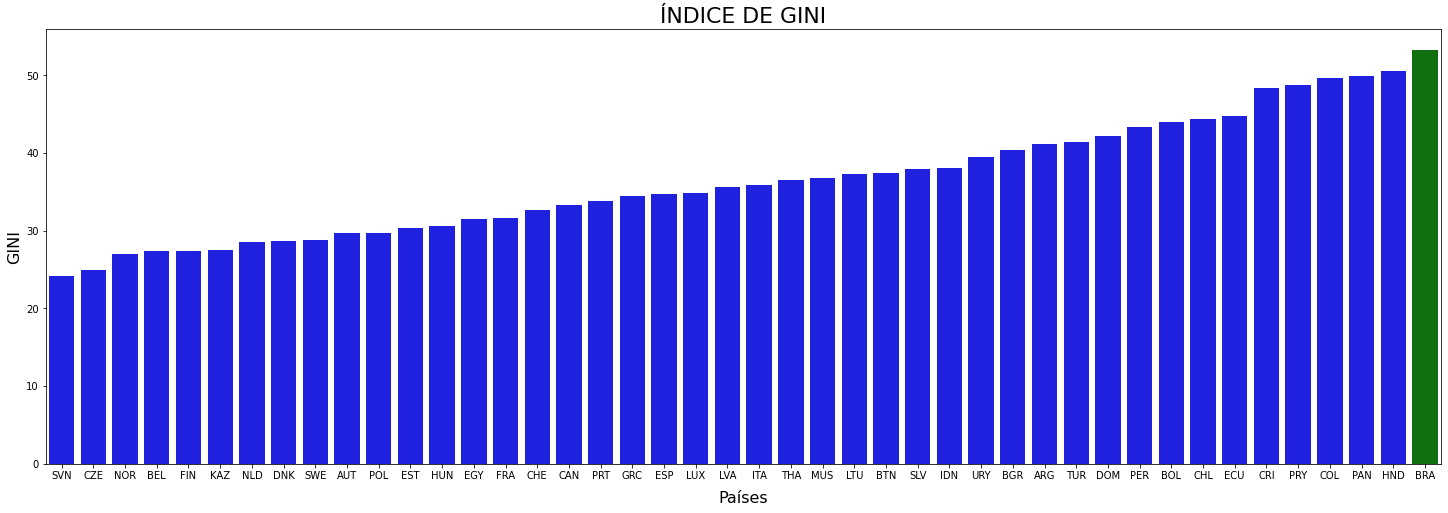

In [15]:
### Gerando o gráfico de gini
# Mostrar os gráficos do matplotlib na mesma janela do jupyter notebook
%matplotlib inline

# Organizando os dados pela coluna de intersse: indicador Gini
gini_graphic = gini_ct_tot_pib.sort_values(by=["gini_value"])

# Define um objeto de figura
fig = plt.figure(figsize=(25,8))

# Adiciona um subplot, pois uma figura pode ter vários plots
ax = fig.add_subplot()

# Desenha um gráfico de linhas com o dataset
# Plota cada linha. lw significa line width
collor_pallet = ['green' if c == "BRA" else 'blue' for c in gini_graphic["country_code"].values]
gini_plot = sns.barplot(x="country_code",y='gini_value',data=gini_graphic,lw=4,palette=collor_pallet, ax=ax)

plt.title('ÍNDICE DE GINI', fontsize=22, ha='center', color='black')
plt.ylabel('GINI',fontsize=16,color='black')
plt.xlabel('Países',fontsize=16,color='black', labelpad=10)

Text(0.5, 0, 'Países')

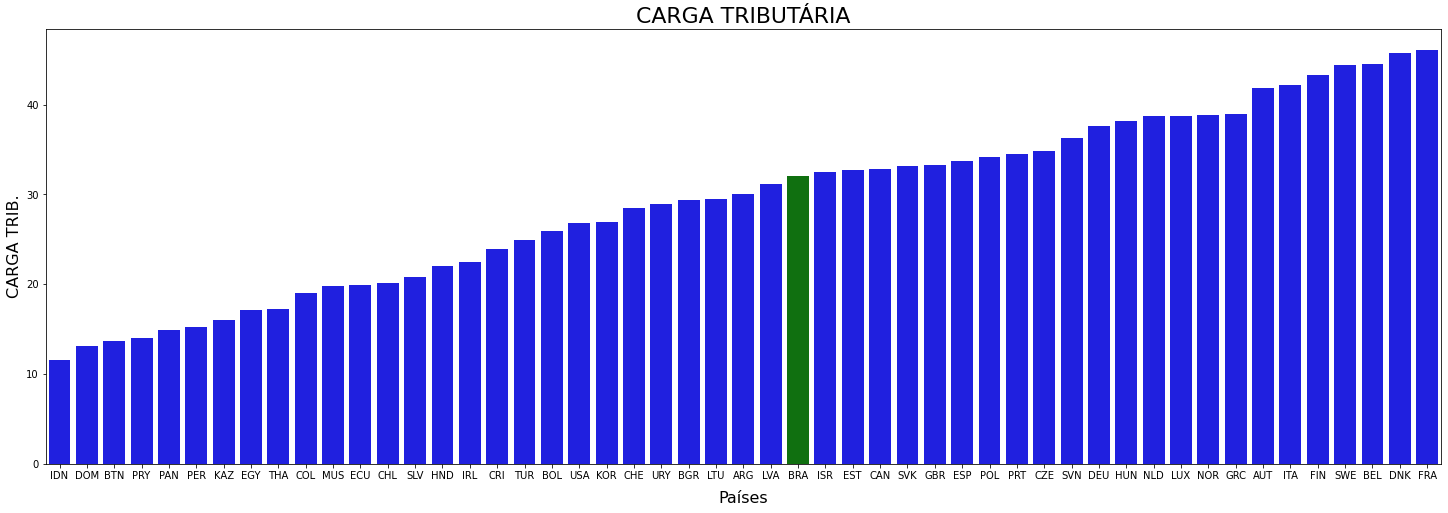

In [33]:
# Gerando o gráfico de gini
tl_graphic = gini_ct_tot_pib.sort_values(by=["tax_burden_value"])
# Mostrar os gráficos do matplotlib na mesma janela do jupyter notebook
#%matplotlib inline

# Define um objeto de figura
fig = plt.figure(figsize=(25,8))

# Adiciona um subplot, pois uma figura pode ter vários plots
ax = fig.add_subplot()

# Desenha um gráfico de linhas com o dataset
# Plota cada linha. lw significa line width
collor_pallet = ["green" if (c == "BRA") else "blue" for c in tl_graphic["country_code"].values]
tl_plot = sns.barplot(x="country_code",y='tax_burden_value',data=tl_graphic,lw=4,palette=collor_pallet,ax=ax)

plt.title('CARGA TRIBUTÁRIA', fontsize=22, ha='center', color='black')
plt.ylabel('CARGA TRIB.',fontsize=16,color='black')
plt.xlabel('Países',fontsize=16,color='black', labelpad=10)

#for bar in tl_plot.patches:
    #bar.set_color('red')
 #   print(bar.get_x())

Text(0.5, 0, 'CARGA TRIBUTÁRIA')

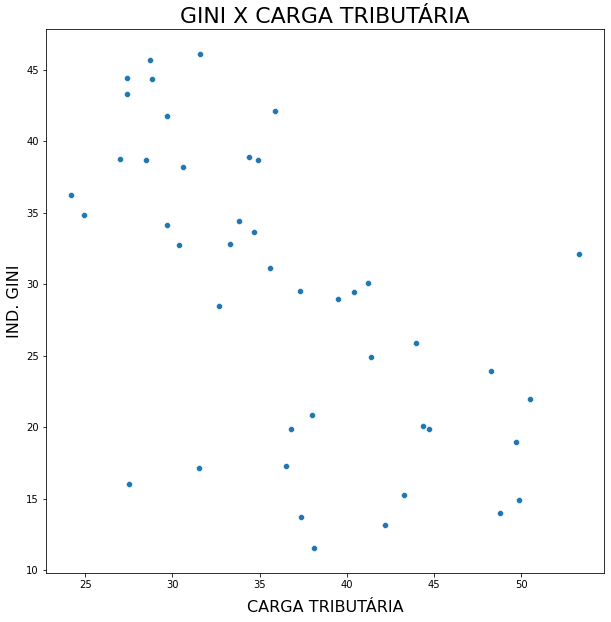

In [17]:
# Gerando o gráfico de gini
tl_graphic = gini_ct_tot_pib.sort_values(by=["tax_burden_value"])
# Mostrar os gráficos do matplotlib na mesma janela do jupyter notebook
%matplotlib inline

# Define um objeto de figura
fig = plt.figure(figsize=(10,10))

# Adiciona um subplot, pois uma figura pode ter vários plots
ax = fig.add_subplot()

# Desenha um gráfico de linhas com o dataset
# Plota cada linha. lw significa line width
tl_plot = sns.scatterplot(x="gini_value",y='tax_burden_value',data=tl_graphic,lw=4,palette="Blues_d",ax=ax)
#sns.catplot(x="country_code", y="Value_x", data=gini_graphic, kind="bar", height=7, aspect=2.8, lw=4, palette="Blues_d")

plt.title('GINI X CARGA TRIBUTÁRIA', fontsize=22, ha='center', color='black')
plt.ylabel('IND. GINI',fontsize=16,color='black')
plt.xlabel('CARGA TRIBUTÁRIA',fontsize=16,color='black', labelpad=10)

In [36]:
tax_burden_on_incomes_profits = load_tax_income("1000")
tax_burden_on_incomes_profits
gini_tb_profit = pd.merge(gini, tax_burden_on_incomes_profits, on="country_code")
gini_tb_profit.corr()


,Year_x,gini_value,Year_y,tax_burden_value
Year_x,NaN,NaN,NaN,NaN
gini_value,NaN,1.000000,NaN,-0.085505
Year_y,NaN,NaN,NaN,NaN
tax_burden_value,NaN,-0.085505,NaN,1.000000


In [ ]:
# Define um objeto de figura
fig = plt.figure(figsize=(10,10))

# Adiciona um subplot, pois uma figura pode ter vários plots
ax = fig.add_subplot()

# Desenha um gráfico de linhas com o dataset
# Plota cada linha. lw significa line width
tl_plot = sns.scatterplot(x="Value_y",y='Value_x',data=gini_tb_profit, lw=4,palette="Blues_d",ax=ax)

plt.title('GINI X CARGA TRIBUTÁRIA', fontsize=22, ha='center', color='black')
plt.ylabel('IND. GINI',fontsize=16,color='black')
plt.xlabel('CARGA TRIBUTÁRIA',fontsize=16,color='black', labelpad=10)

### Conclusões e Achados

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()